In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
equity_details = pd.read_csv("EQUITY_L.csv")
equity_details

,SYMBOL,NAME OF COMPANY,SERIES,DATE OF LISTING,PAID UP VALUE,MARKET LOT,ISIN NUMBER,FACE VALUE
0,20MICRONS,20 Microns Limited,EQ,06-OCT-2008,5,1,INE144J01027,5
1,21STCENMGM,21st Century Management Services Limited,BE,03-MAY-1995,10,1,INE253B01015,10
2,360ONE,360 ONE WAM LIMITED,EQ,19-SEP-2019,1,1,INE466L01038,1
3,3IINFOLTD,3i Infotech Limited,EQ,22-OCT-2021,10,1,INE748C01038,10
4,3MINDIA,3M India Limited,EQ,13-AUG-2004,10,1,INE470A01017,10
...,...,...,...,...,...,...,...,...
1975,ZOTA,Zota Health Care LImited,EQ,19-AUG-2019,10,1,INE358U01012,10
1976,ZUARI,Zuari Agro Chemicals Limited,EQ,27-NOV-2012,10,1,INE840M01016,10
1977,ZUARIIND,ZUARI INDUSTRIES LIMITED,EQ,12-APR-1995,10,1,INE217A01012,10
1978,ZYDUSLIFE,Zydus Lifesciences Limited,EQ,18-APR-2000,1,1,INE010B01027,1


In [3]:
equity_details["SYMBOL"]

0        20MICRONS
1       21STCENMGM
2           360ONE
3        3IINFOLTD
4          3MINDIA
           ...    
1975          ZOTA
1976         ZUARI
1977      ZUARIIND
1978     ZYDUSLIFE
1979     ZYDUSWELL
Name: SYMBOL, Length: 1980, dtype: object

In [5]:
for name in equity_details["SYMBOL"]:
    try:
        data = yf.download(f'{name}.NS')
        data.to_csv(f'./equities/{name}.csv')
    except Exception as e:
        print(f"{name} :: {e}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [41]:
df = pd.read_csv("D:/time-series-stock-pred/equities/RELIANCE.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,14.638248,14.716795,14.541850,14.691803,9.302443,52060684
1996-01-02,14.656100,14.727506,14.470444,14.577553,9.230103,84371654
1996-01-03,14.816763,15.491551,14.656100,14.688232,9.300183,104661939
1996-01-04,14.548991,14.595404,14.356194,14.552561,9.214279,108450132
1996-01-05,14.495436,14.495436,14.327632,14.452592,9.150980,83354233
...,...,...,...,...,...,...
2024-02-27,2966.050049,2999.899902,2956.100098,2971.300049,2971.300049,5413022
2024-02-28,2966.000000,2982.550049,2900.350098,2911.250000,2911.250000,4323975
2024-02-29,2930.000000,2957.949951,2909.050049,2921.600098,2921.600098,11814488


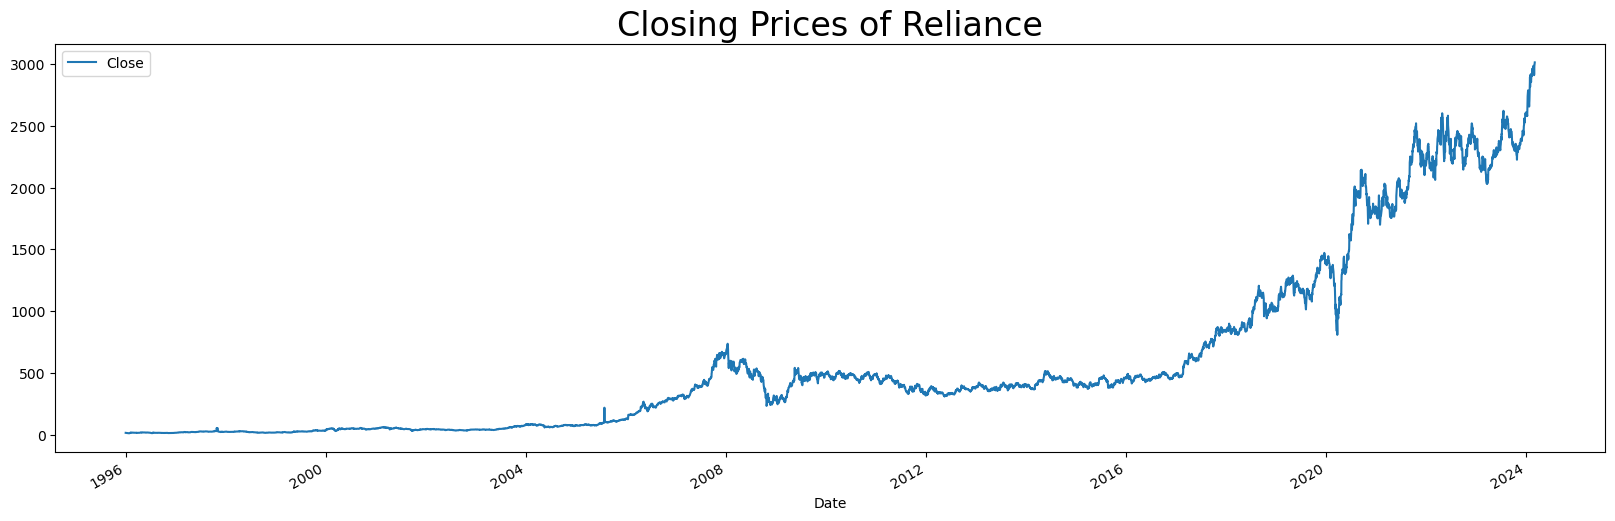

In [42]:
ax = df[['Close']].plot(figsize=(20, 6))
ax.set_title('Closing Prices of Reliance', fontsize=24);

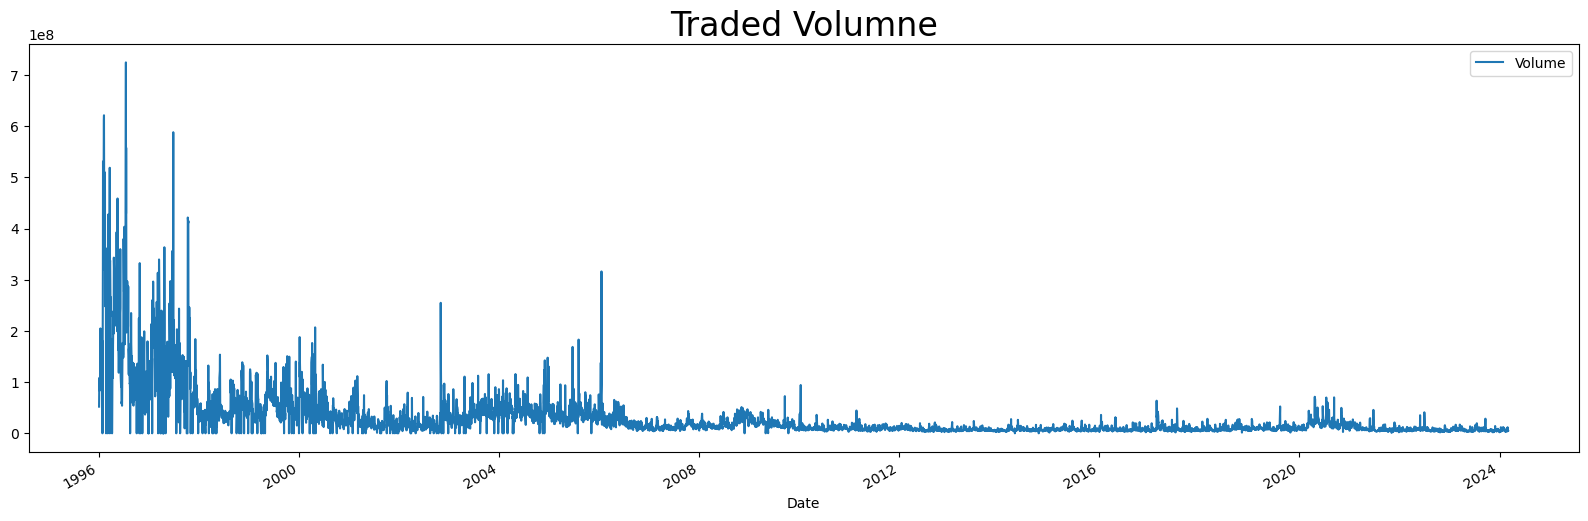

In [43]:
ax = df[['Volume']].plot(figsize=(20, 6))
ax.set_title('Traded Volumne', fontsize=24);

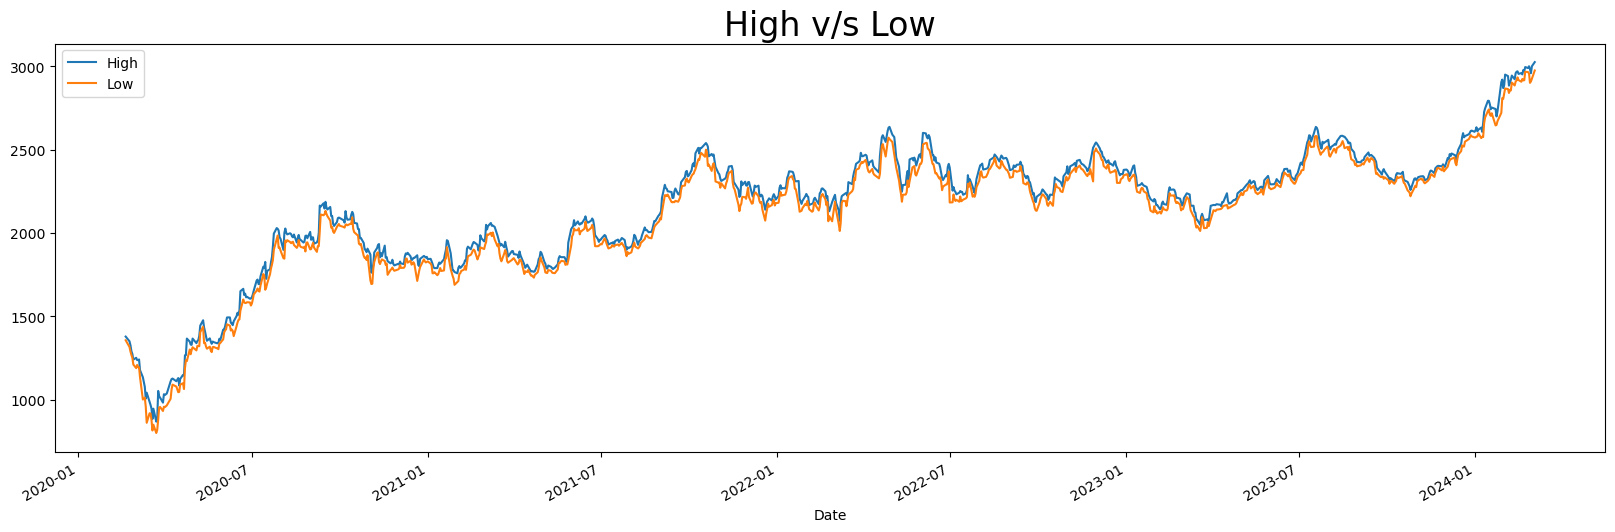

In [44]:
ax = df[['High', 'Low']][-1000:].plot(figsize=(20, 6))
ax.set_title('High v/s Low', fontsize=24);

In [45]:
df['VWAP'] = (((df['High'] + df['Low'] + df['Close']) / 3) * df['Volume']).cumsum() / df['Volume'].cumsum()

Text(0.5, 1.0, 'VWAP')

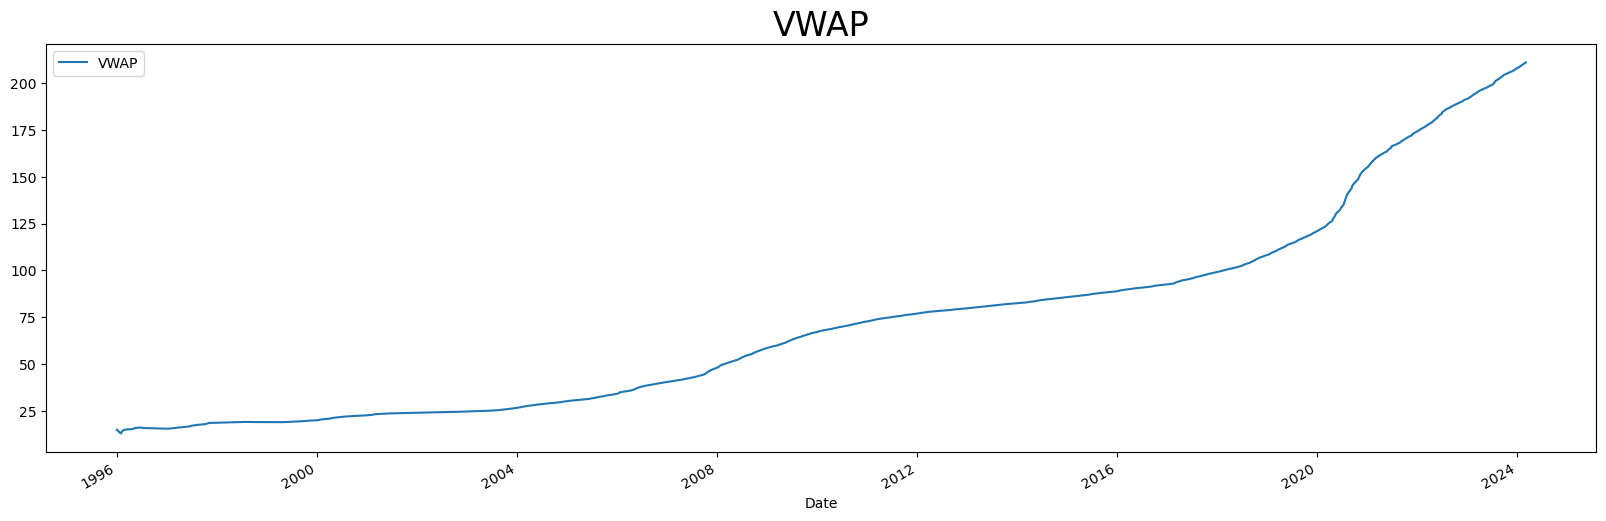

In [46]:
ax = df[['VWAP']].plot(figsize=(20, 6))
ax.set_title('VWAP', fontsize=24)

Text(0.5, 1.0, 'End of year VWAP for Reliance')

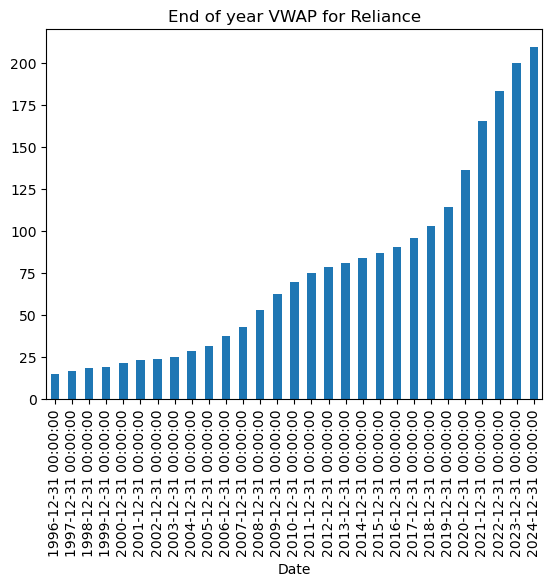

In [48]:
df['VWAP'].resample('A').mean().plot(kind='bar')
plt.title('End of year VWAP for Reliance')

Text(0.5, 1.0, 'Monthly Mean 2023 VWAP for RELIANCE')

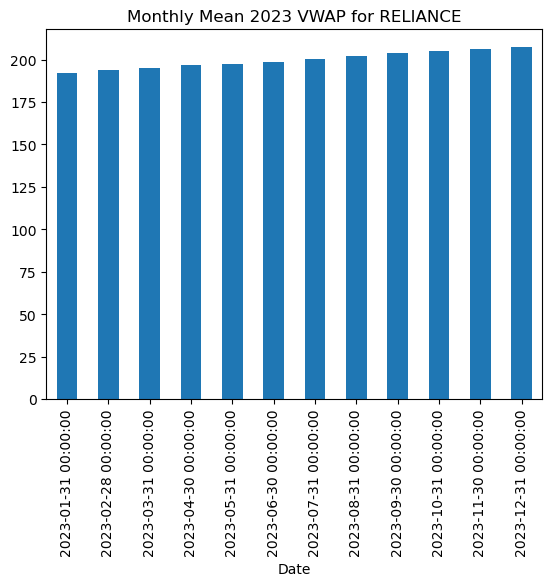

In [52]:
df['VWAP']['2023'].resample('M').mean().plot(kind='bar')
plt.title('Monthly Mean 2023 VWAP for RELIANCE')